In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.28MB/s]


In [4]:
noise_factor = 0.5

In [5]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
train_losses = []
num_epochs = 50

In [7]:
for epoch in range(num_epochs):
    epoch_loss = 0
    num_batches = 0
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        noisy_img = img + noise_factor * torch.randn_like(img)
        noisy_img = torch.clip(noisy_img, 0., 1.)
        output = model(noisy_img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        num_batches += 1

    avg_loss = epoch_loss / num_batches
    train_losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/50], Loss: 0.0693
Epoch [2/50], Loss: 0.0548
Epoch [3/50], Loss: 0.0493
Epoch [4/50], Loss: 0.0455
Epoch [5/50], Loss: 0.0435
Epoch [6/50], Loss: 0.0423
Epoch [7/50], Loss: 0.0413
Epoch [8/50], Loss: 0.0405
Epoch [9/50], Loss: 0.0398
Epoch [10/50], Loss: 0.0392
Epoch [11/50], Loss: 0.0387
Epoch [12/50], Loss: 0.0383
Epoch [13/50], Loss: 0.0379
Epoch [14/50], Loss: 0.0376
Epoch [15/50], Loss: 0.0373
Epoch [16/50], Loss: 0.0370
Epoch [17/50], Loss: 0.0368
Epoch [18/50], Loss: 0.0366
Epoch [19/50], Loss: 0.0364
Epoch [20/50], Loss: 0.0362
Epoch [21/50], Loss: 0.0361
Epoch [22/50], Loss: 0.0359
Epoch [23/50], Loss: 0.0358
Epoch [24/50], Loss: 0.0357
Epoch [25/50], Loss: 0.0355
Epoch [26/50], Loss: 0.0355
Epoch [27/50], Loss: 0.0353
Epoch [28/50], Loss: 0.0353
Epoch [29/50], Loss: 0.0352
Epoch [30/50], Loss: 0.0352
Epoch [31/50], Loss: 0.0350
Epoch [32/50], Loss: 0.0349
Epoch [33/50], Loss: 0.0349
Epoch [34/50], Loss: 0.0348
Epoch [35/50], Loss: 0.0349
Epoch [36/50], Loss: 0.0348
E

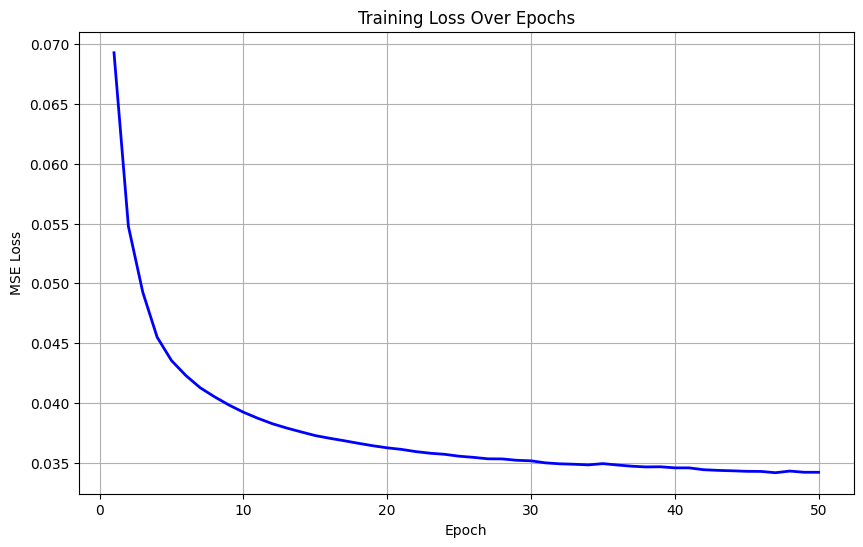

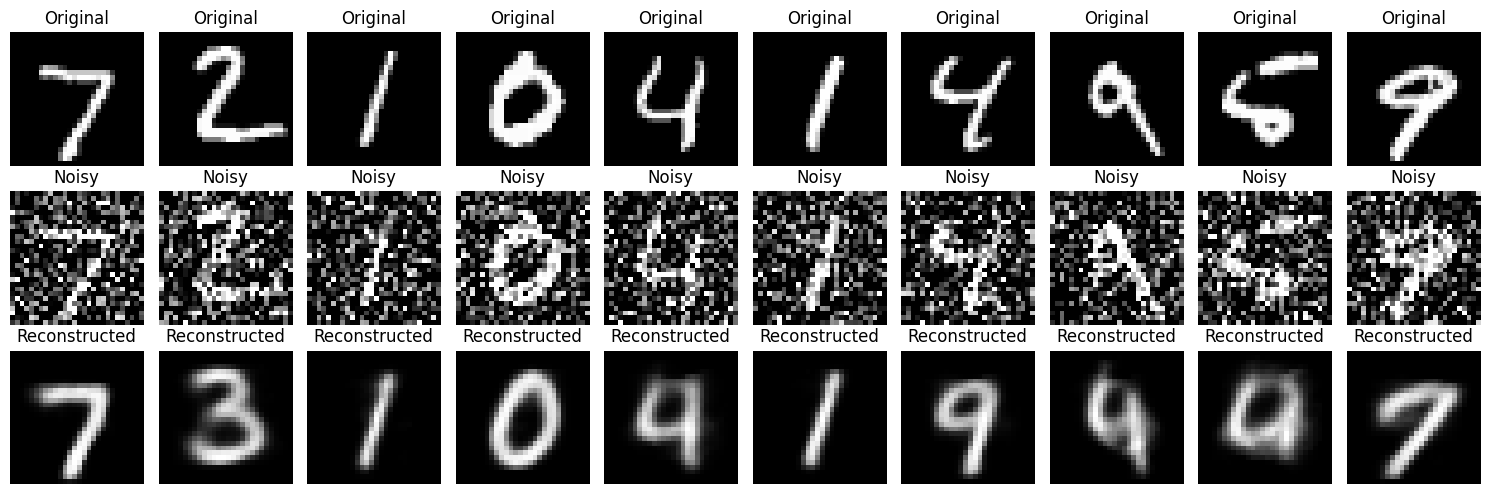

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, 'b-', linewidth=2)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

model.eval()
with torch.no_grad():
    for data in test_loader:
        test_img, _ = data
        test_img = test_img.view(test_img.size(0), -1)
        noisy_test_img = test_img + noise_factor * torch.randn_like(test_img)
        noisy_test_img = torch.clip(noisy_test_img, 0., 1.)
        reconstructed = model(noisy_test_img)
        break

test_img = test_img.view(-1, 28, 28)
noisy_test_img = noisy_test_img.view(-1, 28, 28)
reconstructed = reconstructed.view(-1, 28, 28)

fig, axes = plt.subplots(3, 10, figsize=(15, 5))
for i in range(10):
    axes[0, i].imshow(test_img[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    axes[1, i].imshow(noisy_test_img[i], cmap='gray')
    axes[1, i].set_title('Noisy')
    axes[1, i].axis('off')

    axes[2, i].imshow(reconstructed[i], cmap='gray')
    axes[2, i].set_title('Reconstructed')
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()


In [9]:
model.eval()
test_loss = 0
num_test_batches = 0
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        noisy_img = img + noise_factor * torch.randn_like(img)
        noisy_img = torch.clip(noisy_img, 0., 1.)
        output = model(noisy_img)
        loss = criterion(output, img)
        test_loss += loss.item()
        num_test_batches += 1

avg_test_loss = test_loss / num_test_batches
print(f'Test Loss: {avg_test_loss:.4f}')

Test Loss: 0.0339


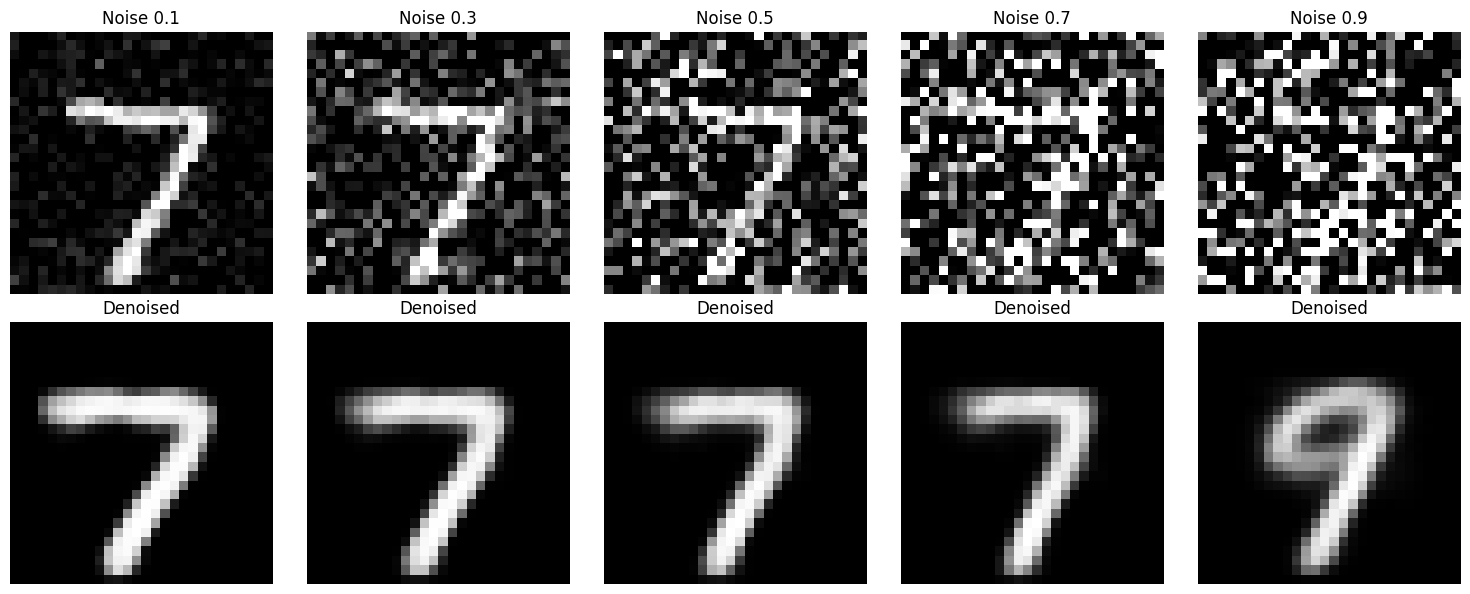

In [10]:
model.eval()
with torch.no_grad():
    sample_img, _ = next(iter(test_loader))
    sample_img = sample_img[:1].view(1, -1)

    noise_levels = [0.1, 0.3, 0.5, 0.7, 0.9]
    fig, axes = plt.subplots(2, len(noise_levels), figsize=(15, 6))

    for i, noise_level in enumerate(noise_levels):
        noisy_sample = sample_img + noise_level * torch.randn_like(sample_img)
        noisy_sample = torch.clip(noisy_sample, 0., 1.)
        reconstructed_sample = model(noisy_sample)

        axes[0, i].imshow(noisy_sample.view(28, 28), cmap='gray')
        axes[0, i].set_title(f'Noise {noise_level}')
        axes[0, i].axis('off')

        axes[1, i].imshow(reconstructed_sample.view(28, 28), cmap='gray')
        axes[1, i].set_title(f'Denoised')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()